In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.formula.api as sm
from sklearn.preprocessing import scale
import seaborn as sns
import statsmodels.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [55]:
auto = pd.read_csv("C:/Users/Kavita manoj/Downloads/Auto.csv", na_values='?').dropna()

In [56]:
X = auto.iloc[:, 1:8]
Y = auto.iloc[:, 0]

In [57]:
lm = sm.ols('mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin', data=auto).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 30 Mar 2023   Prob (F-statistic):          2.04e-139
Time:                        10:29:54   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
lm_fit = LinearRegression()
lm_fit.fit(X, Y)
lm_fit.coef_

array([-0.49337632,  0.01989564, -0.01695114, -0.00647404,  0.08057584,
        0.75077268,  1.4261405 ])

In [59]:
regi = Ridge(alpha=10000) #alpha = lambda in py
regi.fit(X, Y)
regi.coef_

array([-0.00401002, -0.00383521, -0.02857067, -0.00576105,  0.00326937,
        0.22625175,  0.01979579])

In [60]:
regi = Lasso(alpha=100) #alpha = lambda in py
regi.fit(X, Y)
regi.coef_

array([-0.        , -0.        , -0.        , -0.00750838,  0.        ,
        0.        ,  0.        ])

In [61]:
alphas = 10**np.linspace(10, -2, 100)*0.5
alphas.min()

0.005

In [62]:
alphas.max()

5000000000.0

In [63]:
from sklearn.linear_model import RidgeCV, LassoCV
ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

In [64]:
coefsDf = pd.DataFrame(coefs)
coefsDf

,0,1,2,3,4,5,6
0,-7.673770e-07,-0.000049,-0.000017,-0.000408,6.809623e-07,0.000001,2.648944e-07
1,-9.977224e-07,-0.000063,-0.000023,-0.000530,8.875824e-07,0.000002,3.450354e-07
2,-1.290874e-06,-0.000082,-0.000029,-0.000685,1.152153e-06,0.000002,4.474845e-07
3,-1.659879e-06,-0.000105,-0.000038,-0.000880,1.487916e-06,0.000003,5.772174e-07
4,-2.118044e-06,-0.000134,-0.000048,-0.001121,1.909402e-06,0.000004,7.395981e-07
...,...,...,...,...,...,...,...
95,-4.932882e-01,0.019893,-0.016949,-0.006474,8.057596e-02,0.750770,1.425982e+00
96,-4.933096e-01,0.019894,-0.016950,-0.006474,8.057593e-02,0.750771,1.426021e+00
97,-4.933259e-01,0.019894,-0.016950,-0.006474,8.057591e-02,0.750771,1.426050e+00
98,-4.933382e-01,0.019895,-0.016950,-0.006474,8.057589e-02,0.750772,1.426072e+00


In [65]:
coefsDf.tail()

,0,1,2,3,4,5,6
95,-0.493288,0.019893,-0.016949,-0.006474,0.080576,0.750770,1.425982
96,-0.493310,0.019894,-0.016950,-0.006474,0.080576,0.750771,1.426021
97,-0.493326,0.019894,-0.016950,-0.006474,0.080576,0.750771,1.426050
98,-0.493338,0.019895,-0.016950,-0.006474,0.080576,0.750772,1.426072
99,-0.493347,0.019895,-0.016951,-0.006474,0.080576,0.750772,1.426089


Text(0, 0.5, 'weights')

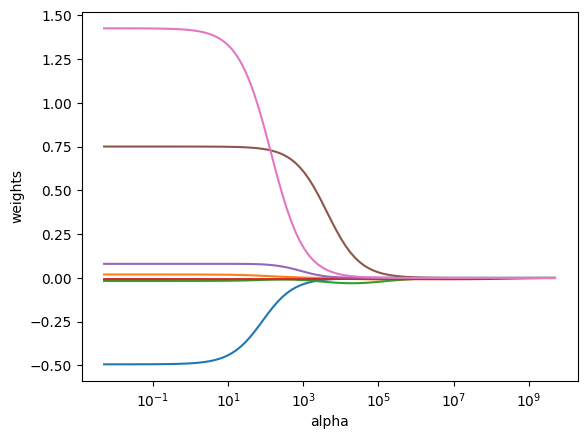

In [66]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [67]:
from sklearn.linear_model import RidgeCV, LassoCV
lasso = Lasso()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, Y)
    coefs.append(ridge.coef_)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [69]:
y_train

0      18.0
339    26.6
23     26.0
315    24.3
343    39.1
       ... 
306    28.8
62     13.0
157    15.0
100    18.0
6      14.0
Name: mpg, Length: 196, dtype: float64

In [70]:
ridge2 = Ridge(alpha=100)
ridge2.fit(X_train, y_train)
pred2 = ridge2.predict(X_test)
print(pd.Series(ridge2.coef_, index=X.columns))
print(mean_squared_error(y_test, pred2))

cylinders      -0.175023
displacement   -0.001371
horsepower     -0.008832
weight         -0.005876
acceleration   -0.116152
year            0.665740
origin          0.653599
dtype: float64
12.916783259481402


In [71]:
ridge2.coef_

array([-0.17502321, -0.00137141, -0.00883239, -0.00587578, -0.11615178,
        0.66573968,  0.65359858])

In [72]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

9.369087114301934